In [1]:
#sam processing
import os

from sam_mask import *
#from segment_anything import sam_model_registry, SamAutomaticMaskGenerator
from segment_anything import sam_model_registry, SamPredictor
import matplotlib.pyplot as plt
sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

predictor = SamPredictor(sam)


In [55]:
name_list = os.listdir('images')
ind = 5
img = plt.imread(os.path.join('images',name_list[ind]))
plt.imshow(img)
plt.show()

IndexError: list index out of range

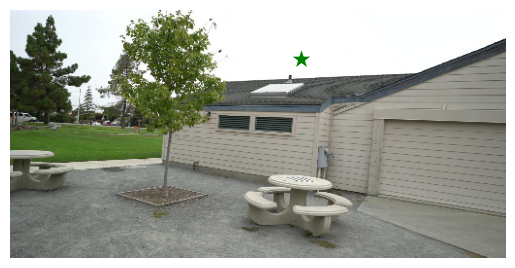

In [49]:
pts = np.array([[300,50]])
plt.imshow(img)
input_label = np.array([1])
show_points(pts,input_label,plt.gca(),marker_size=300)
pl.axis('off')
plt.show()

In [50]:
predictor.set_image(img)
masks, scores, logits = predictor.predict(
        point_coords=pts,
        point_labels=input_label,
        multimask_output=True,
        )

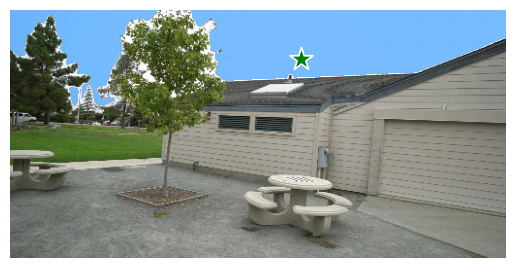

In [53]:
from sam_icp import show_mask
mask_ind = 1
plt.imshow(img)
input_label = np.array([1])
show_mask(masks[mask_ind], pl.gca())
show_points(pts,input_label,plt.gca(),marker_size=300)
pl.axis('off')
plt.show()

In [54]:
maskdir = './exp/barn_ba3_6imgs/masks'
os.makedirs(maskdir,exist_ok=True)
name= name_list[ind].split('.')[0]+'.npy'
np.save(os.path.join(maskdir,name),masks[mask_ind])